# Tabular Data EDA: Imputation
Erica Landreth

Fitness Test | Multiclass or Binary | Accuracy | Loss | Accuracy (imputed data) | Loss (imputed data)
-|-|-|-|-|-
 Children's Global Assessment Scale | Multi | 0.567 | 1.229 | |
 Children's Global Assessment Scale | Binary | 0.567 | 0.827 | |
 Physical Measures | Multi | 0.437 | 1.102 | 0.599 | 1.426?
 Physical Measures | Binary | 0.564 | 0.732 | 0.604 | 0.750?
 Fitness Endurance | Multi | 0.716 | 0.838 | |
 Fitness Endurance | Binary | 0.564 | 0.732 | |
 FitnessGram | Multi | 0.339 | 1.489  | |
 FitnessGram | Binary | 0.405 | 0.902 | |
 Bio-electric Impedance | Multi |  |  | 0.604 | 8.154?
 Bio-electric Impedance | Binary |  |  | 0.604 | 2.115?
 Physical Activity | Multi |  |  | |
 Physical Activity | Binary |  | | |
 Internet Addiction | Multi | 0.430 | 0.971 | |
 Internet Addiction | Binary | 0.404 | 0.902 | |
 Sleep Disturbance Scale | Multi | 0.572 | 1.069 | |
 Sleep Disturbance Scale | Binary | 0.572 | 0.839 | |


### Baseline Model

Fitness Test | Multiclass or Binary |  Accuracy (Training) |  Accuracy (Validation)
-|-|- | -
 All tests | Binary | 0.5157 | 0.5409
 All tests | Multi | 0.5157 | 0.5409


### Experiment1: Regression Model

Fitness Test | Multiclass or Binary | Accuracy (Training) | Loss (Training) | Accuracy (Validation) | Loss (Validation)
-|-|-|-|-|-
 All tests | Binary | 0.7233 | 0.5622 | 0.6478 | 0.6159
 All tests | Multi | 0.5807 | 0.9161 | 0.5346 | 0.9918

### Experiment2: ###  XGBoost Model

Fitness Test | Multiclass or Binary |  Accuracy (Training) |  Accuracy (Validation)
-|-|- | -
 All tests | Binary | 0.8826 | 0.6164
 All tests | Multi | 0.9392 | 0.4780

### NN model

Fitness Test | Multiclass or Binary | hidden_sizes | activation |  optimizer | learning_rate| Accuracy (imputed data) | Loss (imputed data)
-|-|-|-|-|-|-|-
 All tests | Binary | [128] | relu | Adam | 0.01 | 0.549266 |4.221891
 All tests | Binary | [128] | relu | Adam | 0.1 | 0.538784 |0.690803
 All tests | Binary | [128] | tanh | Adam | 0.1 | 0.465409 |1.189648
 All tests | Binary | [256, 128] | relu | Adam | 0.01 | 0.561845 |0.687353
 All tests | Binary | [256, 128] | relu | Adam | 0.1 | 0.538784 |0.695555
 All tests | Multi | [128] | relu | Adam | 0.01 | 0.490566 |11.168718
 All tests | Multi | [128] | relu | Adam | 0.1 | 0.538784 |1.031143
 All tests | Multi | [128] | tanh | Adam | 0.1 | 0.427673 |1.617433
 All tests | Multi | [256, 128] | relu | Adam | 0.01 | 0.547170 |0.998722
 All tests | Multi | [256, 128] | relu | Adam | 0.1 | 0.538784 |1.041104



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import itertools
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [3]:
# data_dir = os.path.abspath(os.path.join('..', 'data'))
data = pd.read_csv('train.csv')
data_dict = pd.read_csv('data_dictionary.csv')


In [4]:
data_dict

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [5]:
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [6]:
data.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

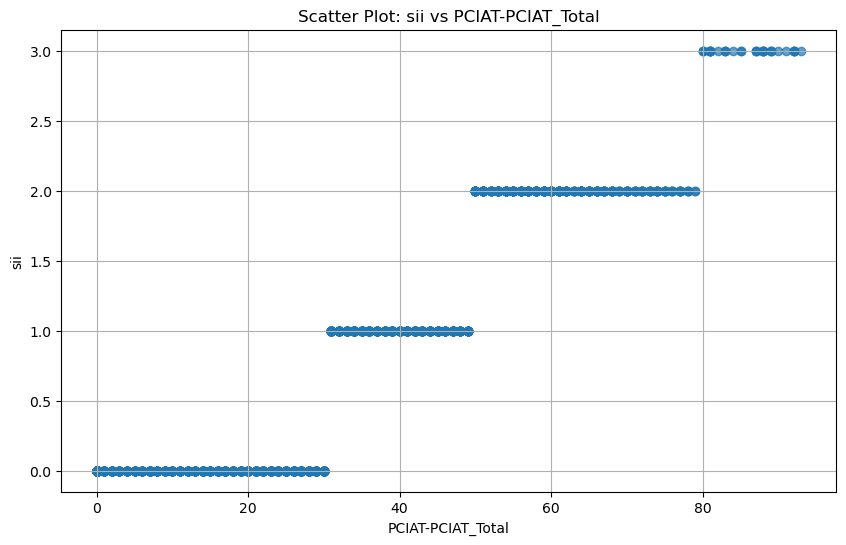

In [7]:
import matplotlib.pyplot as plt

if 'PCIAT-PCIAT_Total' in data.columns and 'sii' in data.columns:
    # Plotting sii vs PCIAT-PCIAT_Total
    plt.figure(figsize=(10, 6))
    plt.scatter(data['PCIAT-PCIAT_Total'], data['sii'], alpha=0.7)
    plt.title('Scatter Plot: sii vs PCIAT-PCIAT_Total')
    plt.xlabel('PCIAT-PCIAT_Total')
    plt.ylabel('sii')
    plt.grid(True)
    plt.show()
else:
    print("The required columns 'PCIAT-PCIAT_Total' and 'sii' are not in the data.")


In [8]:
sii = data.loc[:,'sii']

### Data Imputation

Start with rows that are not missing PCIAT/SII info, and filter out those columns.

Also not super interested in imputing seasons.

In [9]:
data.dropna(subset='sii',inplace=True)
for col in data.columns:
    if 'PCIAT' in col or 'Season' in col:
        data.drop(col,axis=1,inplace=True)

In [10]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0,2.0
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0,0.0
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0,0.0
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0,1.0
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0,1.0


In [11]:
is_missing = data.isna().sum(axis=0).to_frame()
is_missing
# is_missing.to_csv('is_missing.csv')

,0
id,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,394
Physical-BMI,209
Physical-Height,206
Physical-Weight,164
Physical-Waist_Circumference,2253
Physical-Diastolic_BP,258
Physical-HeartRate,250


**PAQ: Seems like only adult or child field will be filled in. So combine them.**

In [12]:
data['PAQ'] = data['PAQ_A-PAQ_A_Total'].fillna(data['PAQ_C-PAQ_C_Total'])
data.drop('PAQ_A-PAQ_A_Total',axis=1,inplace=True)
data.drop('PAQ_C-PAQ_C_Total',axis=1,inplace=True)

**Physical: height/weight info probably not as informative as BMI, so use that instead. Also, can fill from BIA BMI if stil missing.**

In [13]:
data.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
5,001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110


In [14]:
data['calc-BMI'] = data['Physical-Weight']*0.453592 / (data['Physical-Height']*0.0254)**2
                        #weight kg/height m squared
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['calc-BMI'])
data['Physical-BMI'] = data['Physical-BMI'].fillna(data['BIA-BIA_BMI'])

# and fill the other way around too
data['BIA-BIA_BMI'] = data['BIA-BIA_BMI'].fillna(data['Physical-BMI'])

data.drop('Physical-Height',axis=1,inplace=True)
data.drop('Physical-Weight',axis=1,inplace=True)
data.drop('calc-BMI',axis=1,inplace=True)


**FitnessGram: Zones are derived from values and age. Can either fill in zones from these other fields, or drop entirely, since this is somewhat redundant info, and tends to be missing more often than the value itself.**

**Or maybe, instead of zones (which tend to take only 2-3 values), create some sort of "age-adjusted" value column, which takes into account age, but is more descriptive than zone**

In [15]:
# base = ['CU','GSND','GSD','PU','SRL','SRR','TL']
# for b in base:
#     f1 = f'FGC-FGC_{b}'
#     f2 = f1+'_Zone'
#     fig,ax = plt.subplots(1,1)
#     ax.scatter(f1,f2,c='Basic_Demos-Age',data=data,alpha=0.1)
#     ax.set_xlabel(f'{b} Value')
#     ax.set_ylabel(f'{b} Zone')
#     ax.set_title('Colored by age')
#     plt.show()

For now, for the sake of simplicity, assume it's ok to remove the zone fields.

In [16]:
[col for col in data.columns if '_Zone' in col]

['FGC-FGC_CU_Zone',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL_Zone']

In [17]:
data.drop([col for col in data.columns if '_Zone' in col],axis=1,inplace=True)

In [18]:
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,22.0,75.0,70.0,122.0,NaN,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,NaN,65.0,94.0,117.0,5.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,NaN,60.0,97.0,117.0,6.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
5,001f3379,13,1,50.0,22.279952,NaN,60.0,73.0,102.0,NaN,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,8,0,NaN,17.139810,25.0,60.0,65.0,112.0,NaN,...,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,0.0,3.440
3954,ff759544,7,1,NaN,13.927006,23.0,65.0,75.0,105.0,NaN,...,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,1.0,NaN
3955,ff8a2de4,13,0,60.0,16.362460,NaN,71.0,70.0,104.0,NaN,...,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,1.0,3.260
3957,ffcd4dbd,11,0,68.0,21.441500,NaN,79.0,99.0,116.0,NaN,...,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,1.0,2.729


In [19]:
is_missing = data.isna().mean(axis=0).to_frame().sort_values(by=0,ascending=False)
is_missing
# below: proportion of data missing each field

# NOTE: Probably a good idea to not use fields that are hardly ever populated,
# but we'll try to impute them nonetheless

,0
Physical-Waist_Circumference,0.823465
Fitness_Endurance-Time_Mins,0.733918
Fitness_Endurance-Time_Sec,0.733918
Fitness_Endurance-Max_Stage,0.732822
FGC-FGC_GSD,0.681652
FGC-FGC_GSND,0.681287
PAQ,0.341374
BIA-BIA_ICW,0.337354
BIA-BIA_Frame_num,0.337354
BIA-BIA_LDM,0.337354


In [20]:
data.drop(list(is_missing[is_missing > 0.5].dropna().index),axis=1,inplace=True)

### Outliers

A lot of the BIA features have ridiculous outliers... let's take care of those

In [21]:
data['BIA-BIA_BMC'] = data['BIA-BIA_BMC'].mask(data['BIA-BIA_BMC'] > 20, pd.NA)
data['BIA-BIA_BMR'] = data['BIA-BIA_BMR'].mask(data['BIA-BIA_BMR'] > 2500, pd.NA)
data['BIA-BIA_DEE'] = data['BIA-BIA_DEE'].mask(data['BIA-BIA_DEE'] > 4000, pd.NA)
data['BIA-BIA_ECW'] = data['BIA-BIA_ECW'].mask(data['BIA-BIA_ECW'] > 80, pd.NA)
data['BIA-BIA_FFM'] = data['BIA-BIA_FFM'].mask(data['BIA-BIA_FFM'] > 200, pd.NA)
data['BIA-BIA_FFMI'] = data['BIA-BIA_FFMI'].mask(data['BIA-BIA_FFMI'] > 25, pd.NA)
data['BIA-BIA_FMI'] = data['BIA-BIA_FMI'].mask(data['BIA-BIA_FMI'] < 0, pd.NA)
data['BIA-BIA_Fat'] = data['BIA-BIA_Fat'].mask(data['BIA-BIA_Fat'] < 0, pd.NA)
data['BIA-BIA_Fat'] = data['BIA-BIA_Fat'].mask(data['BIA-BIA_Fat'] > 100, pd.NA)
data['BIA-BIA_ICW'] = data['BIA-BIA_ICW'].mask(data['BIA-BIA_ICW'] > 100, pd.NA)
data['BIA-BIA_LDM'] = data['BIA-BIA_LDM'].mask(data['BIA-BIA_LDM'] > 50, pd.NA)
data['BIA-BIA_LST'] = data['BIA-BIA_LST'].mask(data['BIA-BIA_LST'] > 150, pd.NA)
data['BIA-BIA_SMM'] = data['BIA-BIA_SMM'].mask(data['BIA-BIA_SMM'] > 100, pd.NA)
data['BIA-BIA_TBW'] = data['BIA-BIA_TBW'].mask(data['BIA-BIA_TBW'] > 125, pd.NA)

### KNN Imputation

In [22]:
# define column groups

cols = list(data.columns)
col_groups = {}

tests = ["Basic_Demos","CGAS","Physical","Fitness_Endurance","FGC","BIA","PAQ","SDS","PreInt"]
for test in tests:
    col_groups[test] = [col for col in data.columns if test in col]

print(col_groups)

feat_cols = list(itertools.chain.from_iterable(col_groups.values()))
print(feat_cols)

{'Basic_Demos': ['Basic_Demos-Age', 'Basic_Demos-Sex'], 'CGAS': ['CGAS-CGAS_Score'], 'Physical': ['Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP'], 'Fitness_Endurance': [], 'FGC': ['FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL'], 'BIA': ['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW'], 'PAQ': ['PAQ'], 'SDS': ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'], 'PreInt': ['PreInt_EduHx-computerinternet_hoursday']}
['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_EC

Since the holes vary so much from record to record, going to brute force it for now and loop through all columns for all records. TODO: think about a more clever way to do this

In [23]:
data.reset_index(inplace=True,drop=True)
data

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,0.0,0.0,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,3.0,2.0,NaN
1,000fd460,9,0,NaN,14.035590,75.0,70.0,122.0,3.0,5.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,46.0,64.0,0.0,0.0,2.340
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,20.0,7.0,...,NaN,NaN,NaN,NaN,NaN,38.0,54.0,2.0,0.0,2.170
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,18.0,5.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,31.0,45.0,0.0,1.0,2.451
4,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,12.0,6.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,40.0,56.0,0.0,1.0,4.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,ff6c2bb8,8,0,NaN,17.139810,60.0,65.0,112.0,0.0,0.0,...,25.7118,15.81500,49.3301,20.2645,36.7181,41.0,58.0,2.0,0.0,3.440
2732,ff759544,7,1,NaN,13.927006,65.0,75.0,105.0,0.0,0.0,...,20.0572,15.14000,42.8185,18.0937,30.0453,48.0,67.0,0.0,1.0,NaN
2733,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,16.0,10.0,...,33.3709,17.97970,66.2889,29.7790,52.8320,35.0,50.0,1.0,1.0,3.260
2734,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,15.0,0.0,...,33.9805,21.34030,71.3903,28.7792,54.4630,56.0,77.0,0.0,1.0,2.729


In [24]:
# data_ref = data.copy()
# N = 3

# for idx in range(data.shape[0]):
#     item = data.loc[[idx]]
#     sii = item.sii.values[0]
#     item = item[feat_cols]

#     is_missing = item.isnull().any()
#     missing_cols = is_missing[is_missing].index.tolist()
#     feat_data = item.dropna(axis=1)

#     for col in missing_cols:
#         feat_ref = data_ref.loc[data['sii'] == sii, list(feat_data.columns) + [col]].dropna()
#         if feat_ref.shape[0] == 0:
#             print("No data")
#         if feat_ref.shape[0] < 5:
#             print('!!!')
#             continue
#         x = feat_ref[list(feat_data.columns)]
#         y = feat_ref[col]
#         if col == 'PAQ':
#             knn = KNeighborsRegressor(n_neighbors=N)
#         elif 'categorical' in data_dict.Type[data_dict.Field == col].values[0]:
#             knn = KNeighborsClassifier(n_neighbors=N)
#         else:
#             knn = KNeighborsRegressor(n_neighbors=N)
#         knn.fit(x,y.values)
#         y_fill = knn.predict(feat_data)
#         data.loc[idx,col] = y_fill


In [25]:
data.shape

(2736, 34)

In [26]:
data.dropna().shape

(795, 34)

# Data Visualization


In [27]:
data = data.dropna()

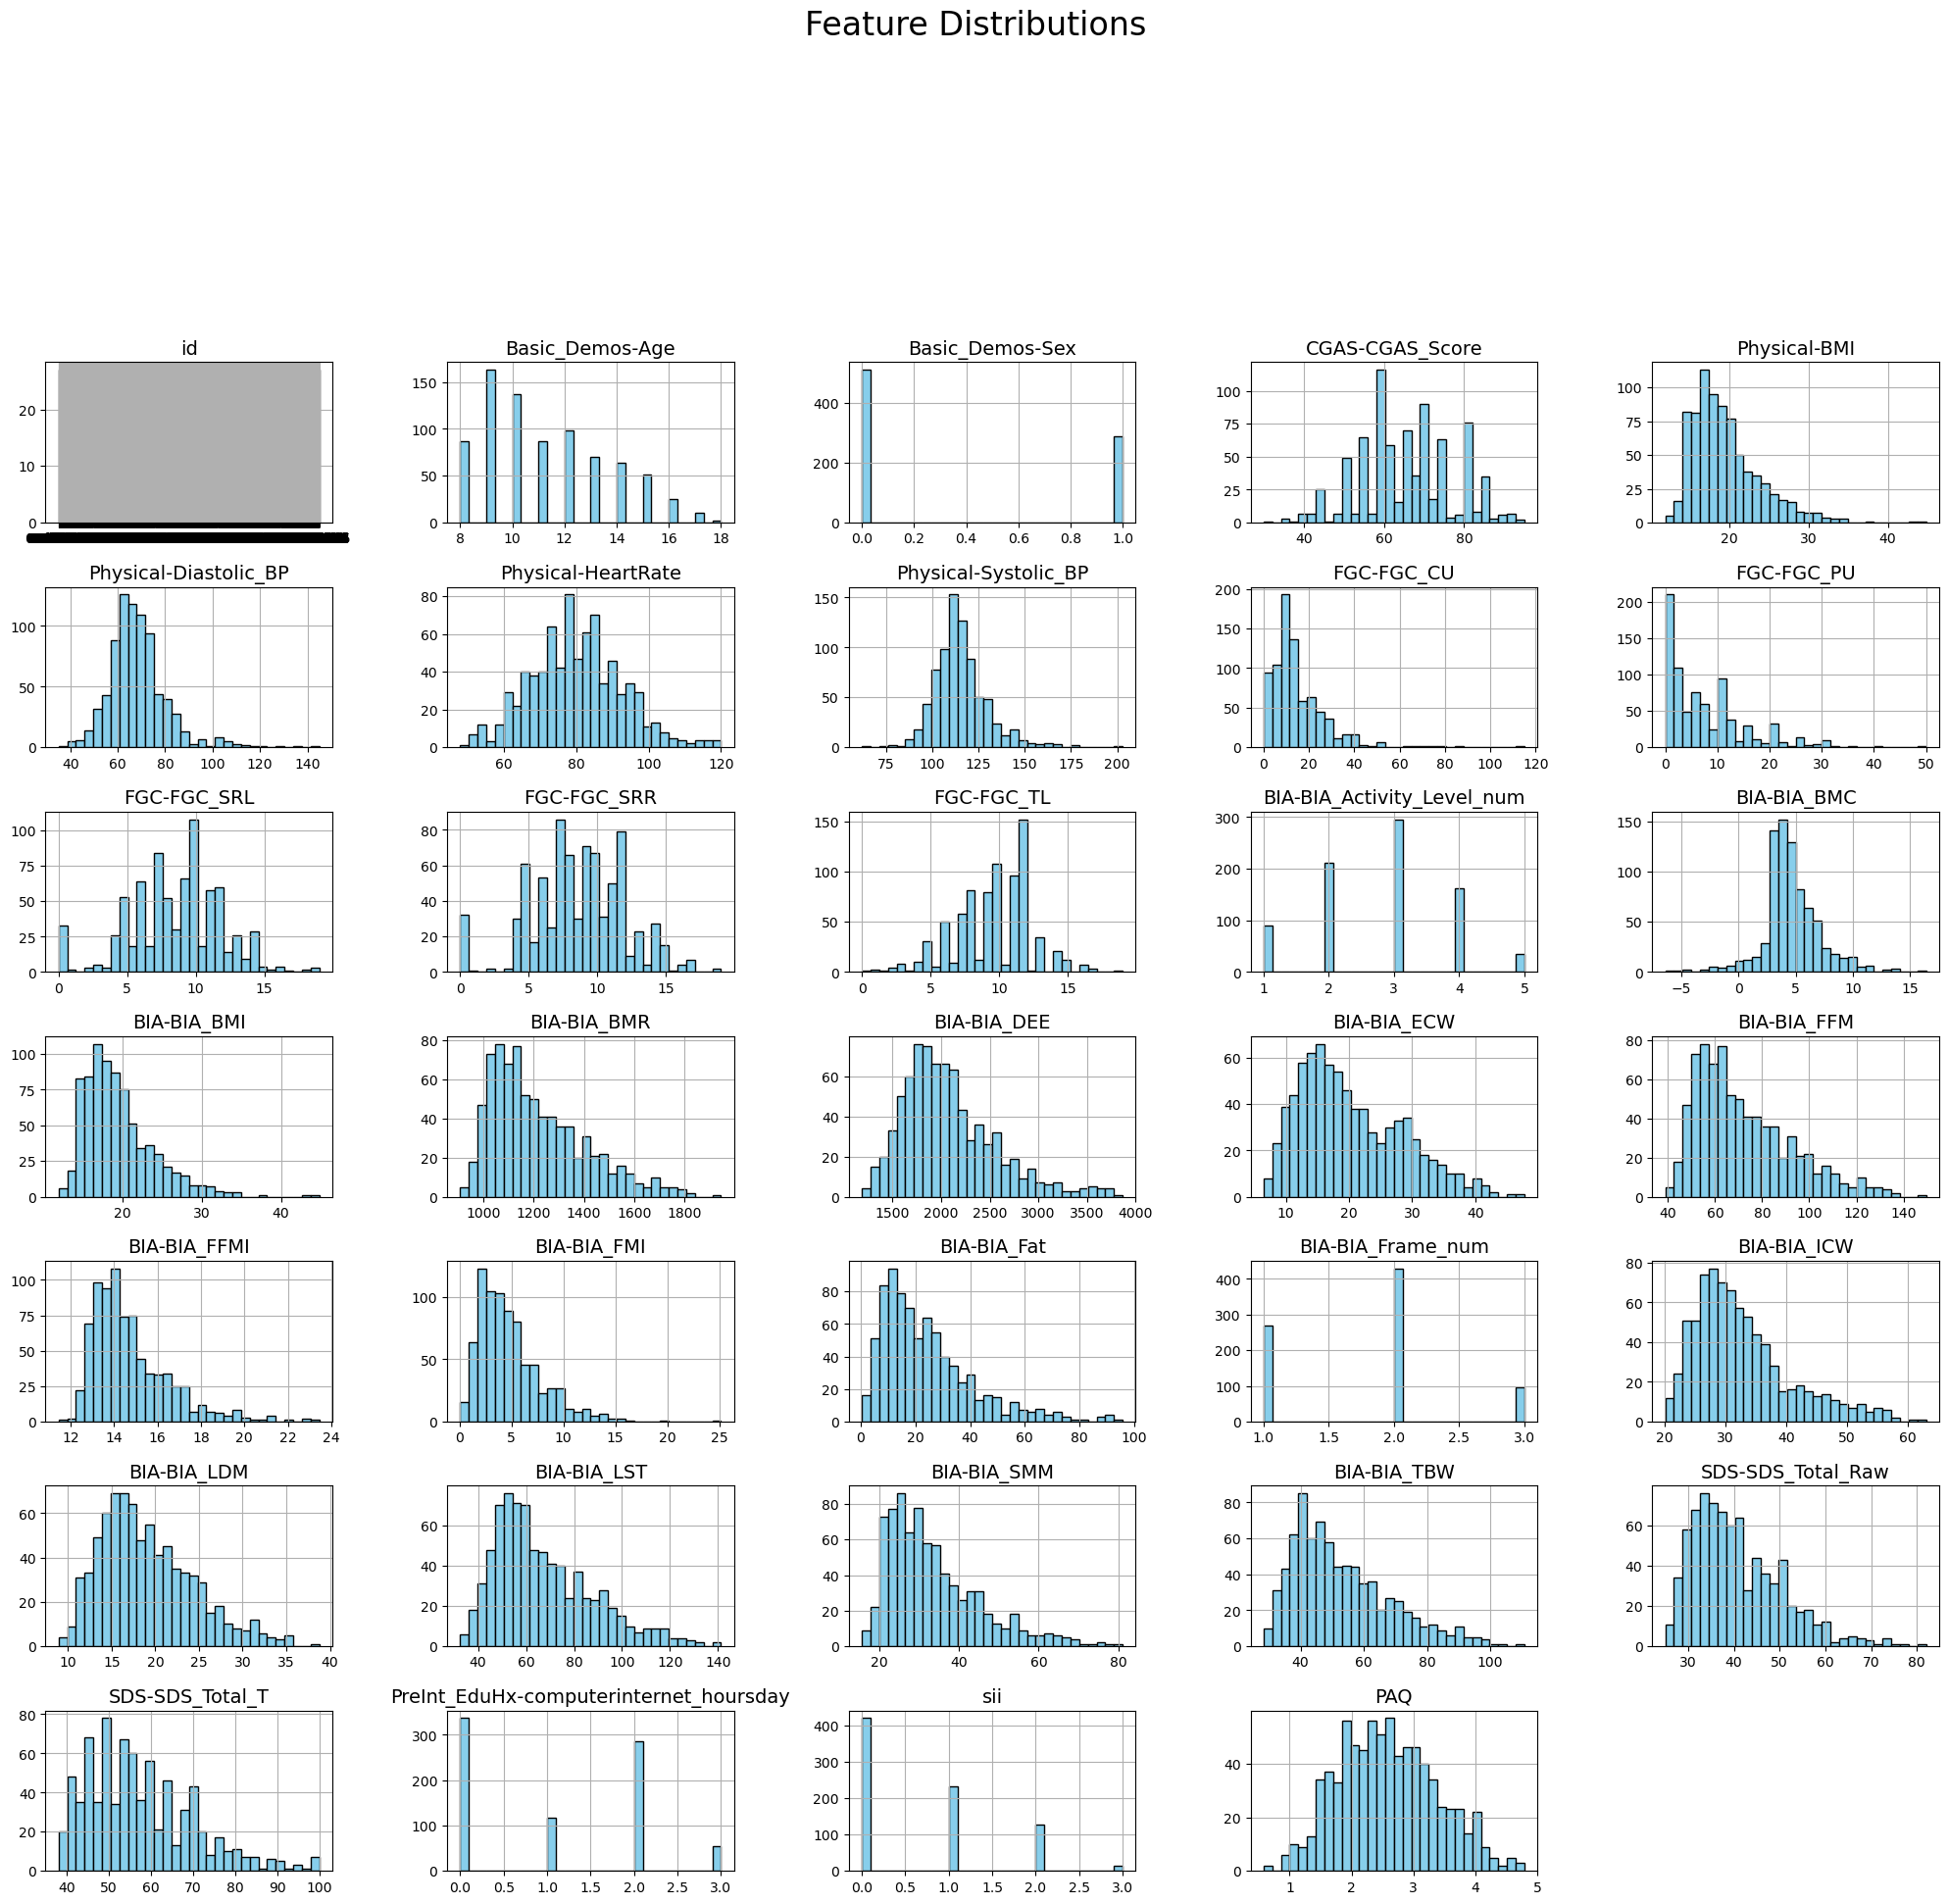

In [28]:

# Set up a larger figure size with individual subplots for each feature's histogram
fig, axes = plt.subplots(nrows=12, ncols=5, figsize=(20, 30))  # Adjust rows and columns as needed
fig.suptitle("Feature Distributions", fontsize=24, y=1.02)  # Title above all plots with larger font size

# Flatten the axes array for easy iteration, if there are fewer plots than grid cells
axes = axes.flatten()

# Plot a histogram for each feature
for i, column in enumerate(data.columns):
    if i < len(axes):  # Avoid error if there are more subplots than columns
        data[column].hist(bins=30, ax=axes[i], color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent title overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)  # Adjust hspace and wspace as needed
plt.show()


### Creating secondary dataset as binary "sii" and plotting all features

In [29]:
Data_binary = data.copy()  # Create a copy of the original DataFrame

# Update 'sii' column to binary values
Data_binary['sii'] = Data_binary['sii'].apply(lambda x: 0 if x == 0 else 1)


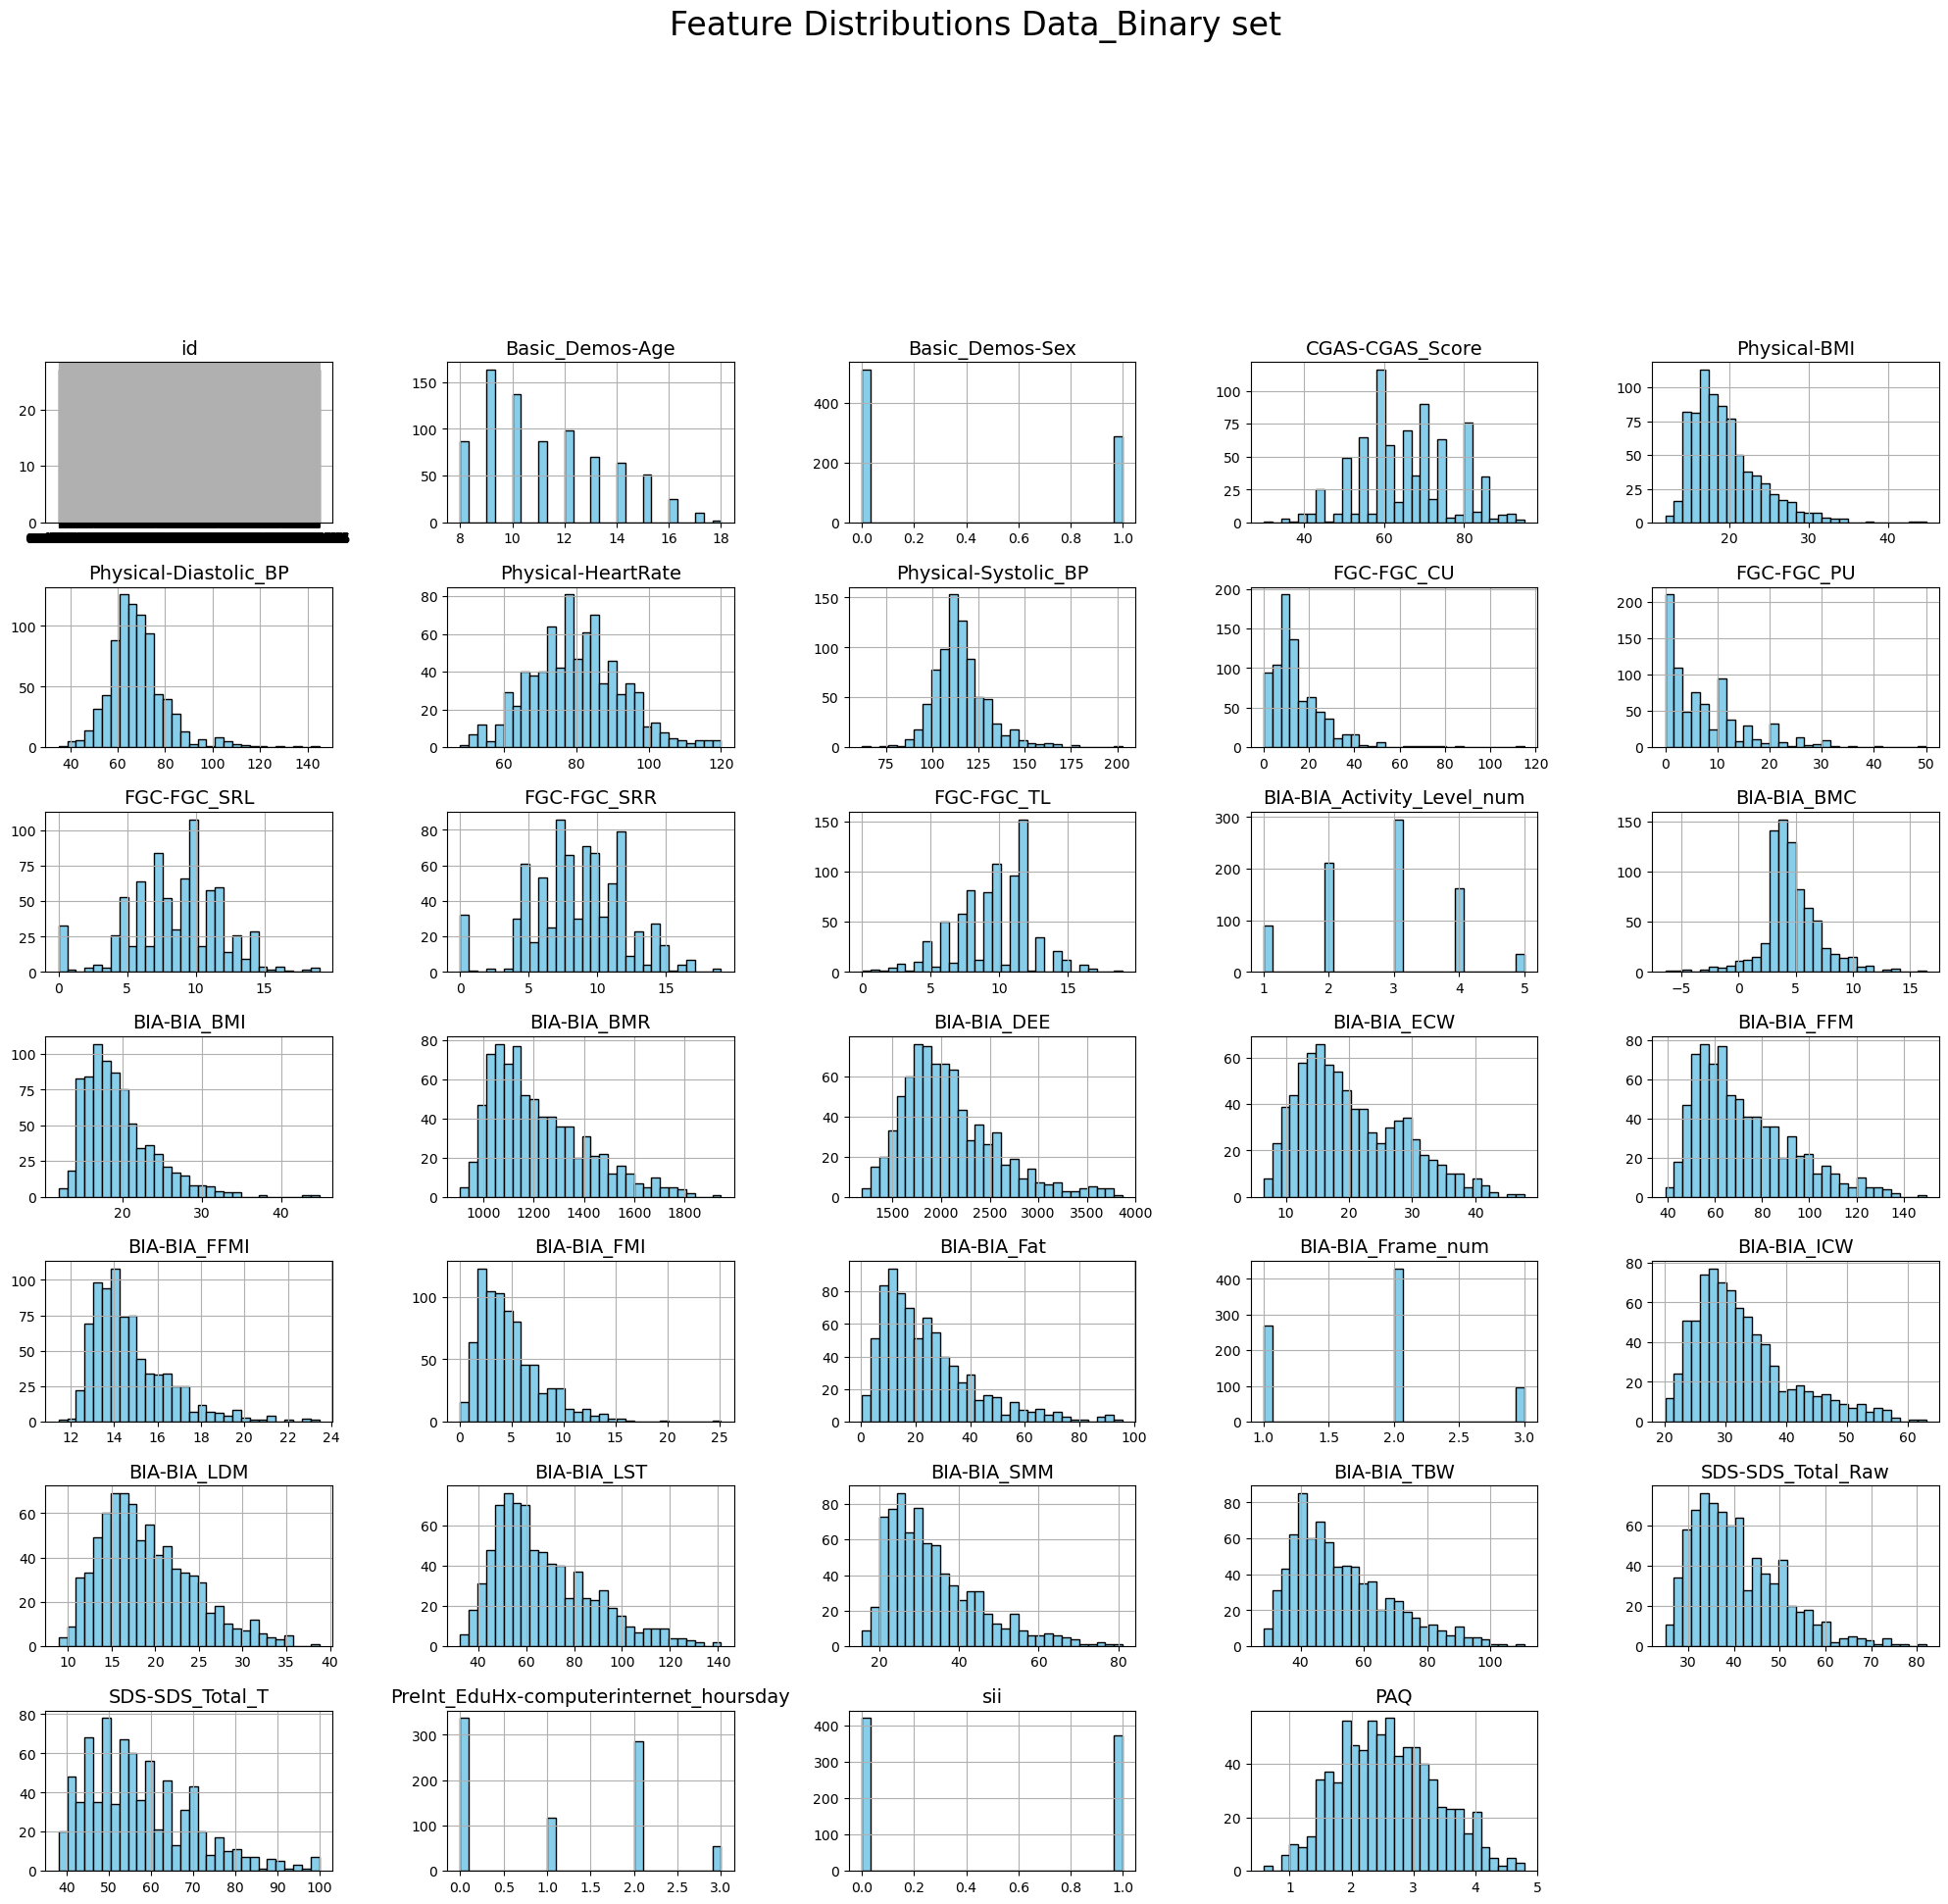

In [30]:

# Set up a larger figure size with individual subplots for each feature's histogram
fig, axes = plt.subplots(nrows=12, ncols=5, figsize=(20, 30))  # Adjust rows and columns as needed
fig.suptitle("Feature Distributions Data_Binary set", fontsize=24, y=1.02)  # Title above all plots with larger font size

# Flatten the axes array for easy iteration, if there are fewer plots than grid cells
axes = axes.flatten()

# Plot a histogram for each feature
for i, column in enumerate(Data_binary.columns):
    if i < len(axes):  # Avoid error if there are more subplots than columns
        Data_binary[column].hist(bins=30, ax=axes[i], color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent title overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)  # Adjust hspace and wspace as needed
plt.show()


# Data prepration for modeling

### One-Hot encoding for cathegorical features


In [86]:

# List of categorical columns to encode
categorical_columns = ['Basic_Demos-Sex','BIA-BIA_Activity_Level_num','BIA-BIA_Frame_num','PreInt_EduHx-computerinternet_hoursday']


# Apply One-Hot Encoding with drop_first=True to avoid dummy variable trap
data_encoded = pd.get_dummies(Data_binary, columns=categorical_columns, drop_first=True)

### Split into train, test, val

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
tf.random.set_seed(1234)
np.random.seed(1234)

# Assume 'data_encoded' is already available and has the features and target column
X = data_encoded.drop(columns=['sii', 'id'])  # Features (drop the target column)
y = data_encoded['sii']  # Target column

# First split: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# Second split: 60% train, 20% val from the remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=1234
)  # 0.25 x 80% = 20% validation

# Print the shapes of the resulting arrays
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (477, 38)
X_val shape: (159, 38)
X_test shape: (159, 38)
y_train shape: (477,)
y_val shape: (159,)
y_test shape: (159,)


### Shuffeling data

In [88]:

# Set random seed for reproducibility
np.random.seed(1234)

# Generate a list of shuffled indices
shuffled_indices = np.random.permutation(len(X_train))

# Reorder the training data using the shuffled indices
X_train = X_train.iloc[shuffled_indices].reset_index(drop=True)  # Shuffle features
y_train = y_train.iloc[shuffled_indices].reset_index(drop=True)  # Shuffle labels

# Verify the reordering (optional)
print("Training data shuffled successfully!")

Training data shuffled successfully!


### Normalizing data

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the validation data using the same scaler
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Convert normalized data back to DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_val_normalized_df = pd.DataFrame(X_val_normalized, columns=X_val.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_val.columns)

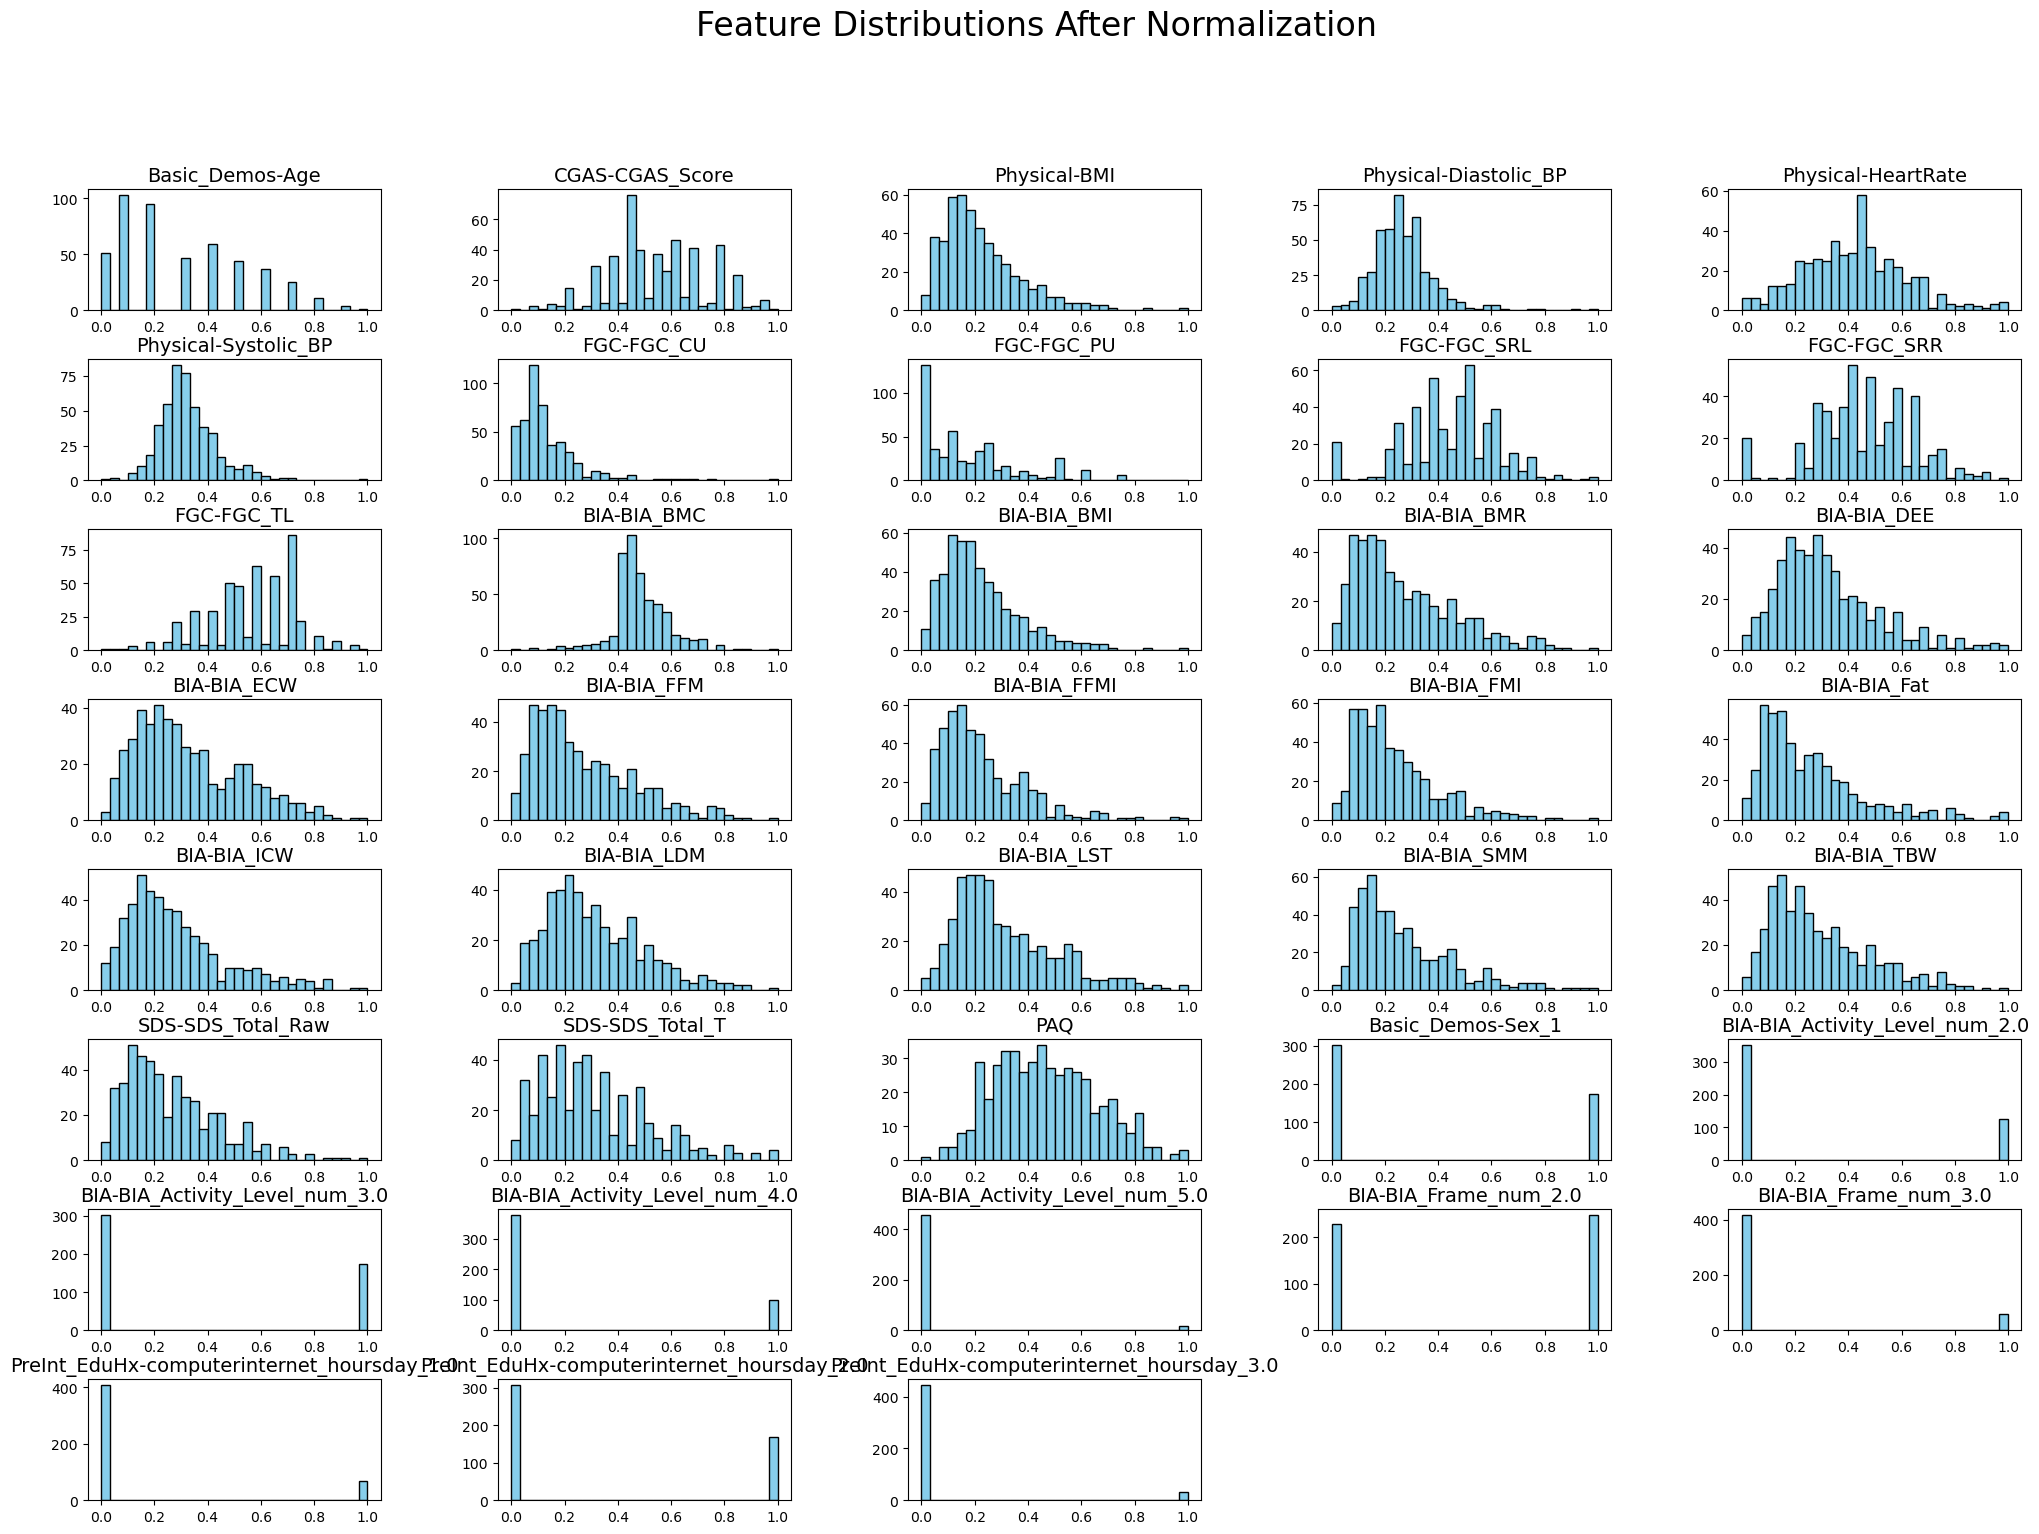

In [90]:
import matplotlib.pyplot as plt

# Plot histograms for normalized training data
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 15))  # Adjust rows/columns to match feature count
fig.suptitle("Feature Distributions After Normalization", fontsize=24, y=1.02)

axes = axes.flatten()

# Plot each feature's histogram
for i, column in enumerate(X_train_normalized_df.columns):
    if i < len(axes):
        axes[i].hist(X_train_normalized_df[column], bins=30, color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
plt.show()


# Modeling

### Baseline Model
- Baseline model only returns 0 for sii regardless of other features

In [71]:
from sklearn.metrics import accuracy_score

# Calculate the percentage of 'sii = 0' in the training set
majority_class_percentage = (y.value_counts(normalize=True) * 100)[0]
print(f"Percentage of 'sii = 0' in training set: {majority_class_percentage:.2f}%")

# Create baseline predictions (always predict '0')
baseline_train_preds = [0] * len(y_train)
baseline_val_preds = [0] * len(y_val)

# Calculate baseline accuracy
train_accuracy = accuracy_score(y_train, baseline_train_preds)
val_accuracy = accuracy_score(y_val, baseline_val_preds)

# Output results
print(f"Baseline Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Baseline Accuracy on Validation Set: {val_accuracy * 100:.2f}%")


# Define the binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0) by clipping probabilities
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Predict probabilities for 'sii = 0' as 1 (baseline)
baseline_train_probs = np.zeros(len(y_train))  # Predicted probabilities for training set
baseline_val_probs = np.zeros(len(y_val))     # Predicted probabilities for validation set

# Calculate binary cross-entropy loss
train_loss = binary_cross_entropy_loss(y_train, baseline_train_probs)
val_loss = binary_cross_entropy_loss(y_val, baseline_val_probs)

print(f"Baseline Loss on Training Set: {train_loss:.4f}")
print(f"Baseline Loss on Validation Set: {val_loss:.4f}")


Percentage of 'sii = 0' in training set: 52.96%
Baseline Accuracy on Training Set: 51.57%
Baseline Accuracy on Validation Set: 54.09%
Baseline Loss on Training Set: 15.4954
Baseline Loss on Validation Set: 15.0609


Confusion Matrix - Training Set:
[[246   0]
 [231   0]]

Confusion Matrix - Validation Set:
[[86  0]
 [73  0]]


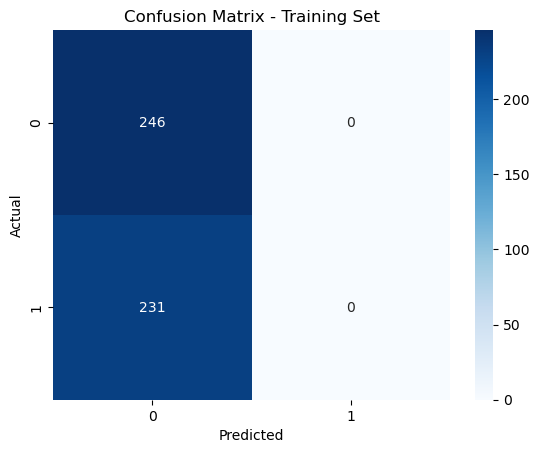

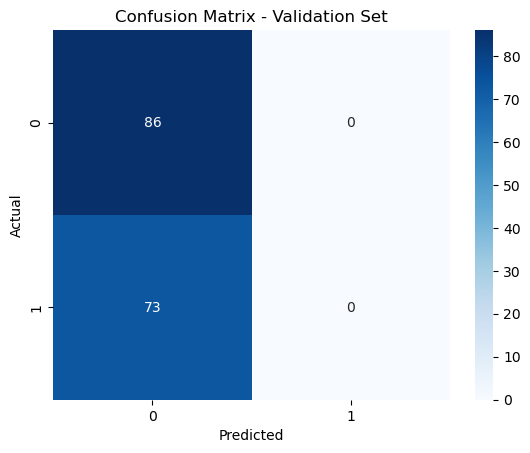

In [91]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training and validation sets
train_cm = confusion_matrix(y_train, baseline_train_preds)
val_cm = confusion_matrix(y_val, baseline_val_preds)

# Display the confusion matrices
print("Confusion Matrix - Training Set:")
print(train_cm)

print("\nConfusion Matrix - Validation Set:")
print(val_cm)

# Plot confusion matrix for training set
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for validation set
sns.heatmap(val_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")

plt.ylabel("Actual")
plt.show()

### Regression Model

In [92]:
import tensorflow as tf

def build_model(num_features, num_classes, learning_rate=0.001):
    """
    Build a TensorFlow multi-class logistic regression model using Keras.
    
    Args:
        num_features (int): Number of input features.
        num_classes (int): Number of output classes.
        learning_rate (float): Learning rate for SGD optimizer.
    
    Returns:
        tf.keras.Model: Compiled multi-class logistic regression model.
    """
    # Clear any existing session to avoid graph duplication
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)  # Set random seed for reproducibility
    np.random.seed(1234)
    random.seed(1234)

    # Build the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=num_classes,               # One unit per class
            input_shape=(num_features,),     # Input features shape
            activation='softmax',            # Softmax activation for multi-class classification
            use_bias=True,                   # Include bias (intercept) in the model
            kernel_initializer='glorot_uniform',  # Recommended initialization for softmax
            bias_initializer='zeros' ,        # Initialize biases to 0
        
        )
    ])

    # Compile the model with sparse categorical cross-entropy loss and SGD optimizer
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
        metrics=['accuracy']
    )
    
    return model


In [93]:


# Align validation set to match training columns
X_val_normalized_df = X_val_normalized_df.reindex(columns=X_train_normalized_df.columns, fill_value=0)

# Get the number of features
num_features = X_train_normalized_df.shape[1]
num_classes = len(y_train.unique())  # Replace with the correct logic to determine the number of classes

# Build the logistic regression model
# Build the logistic regression model
learning_rate = 0.01
model = build_model(num_features=num_features, num_classes=num_classes, learning_rate=learning_rate)

history = model.fit(
    X_train_normalized_df, y_train,
    validation_data=(X_val_normalized_df, y_val),
    epochs=200,
    batch_size=16,
    verbose=0
    
)

# Evaluate the model on the training and validation sets
train_loss, train_accuracy = model.evaluate(X_train_normalized_df, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_normalized_df, y_val, verbose=0)

# Report loss and accuracy
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


/Users/najmerahimi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Loss: 0.5622
Training Accuracy: 0.7233
Validation Loss: 0.6159
Validation Accuracy: 0.6478


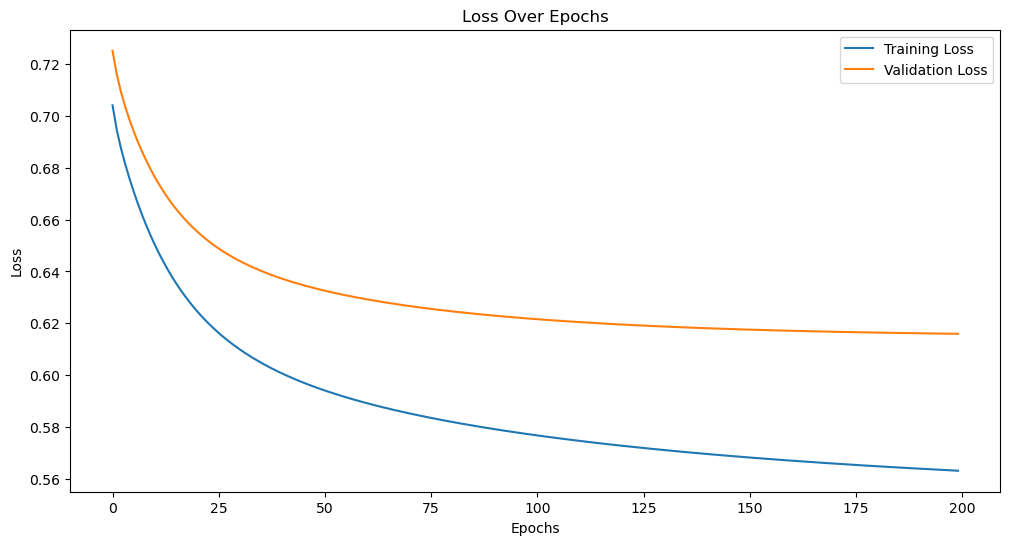

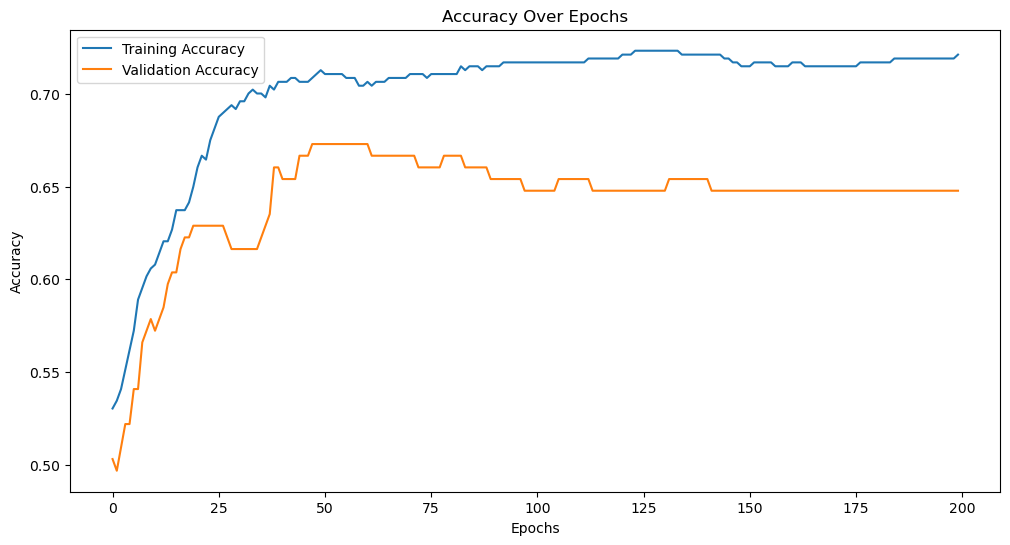

In [94]:
import matplotlib.pyplot as plt

# Extract values for loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


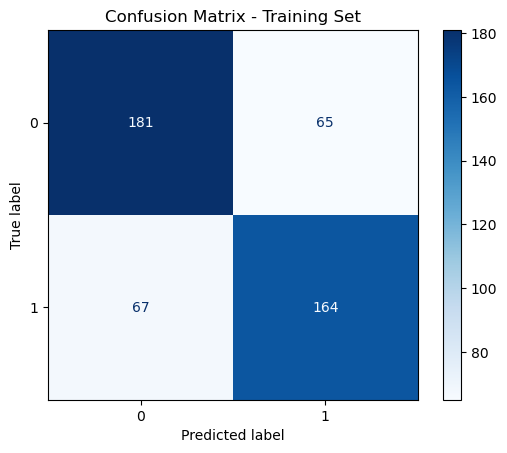

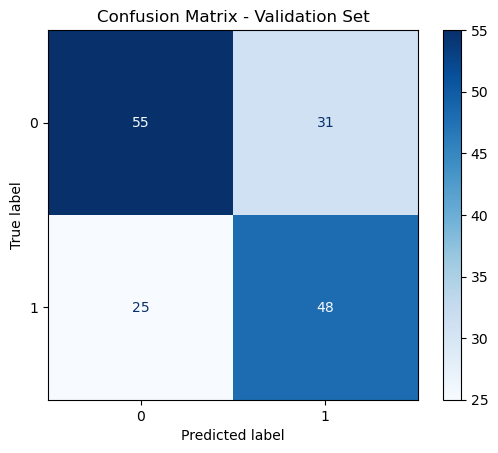

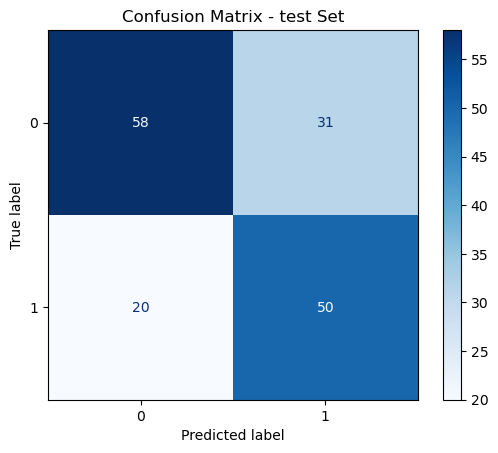

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions for training and validation sets
train_preds = np.argmax(model.predict(X_train_normalized_df), axis=1)  # Predicted classes for training set
val_preds = np.argmax(model.predict(X_val_normalized_df), axis=1)      # Predicted classes for validation set
test_preds = np.argmax(model.predict(X_test_normalized_df), axis=1)      # Predicted classes for validation set

# Generate confusion matrices
train_cm = confusion_matrix(y_train, train_preds)
val_cm = confusion_matrix(y_val, val_preds)
test_cm = confusion_matrix(y_test, test_preds)
# Manually define class labels (e.g., [0, 1] for binary classification)
class_labels = [0, 1]

# Display confusion matrix for training set
ConfusionMatrixDisplay(train_cm, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.show()

# Display confusion matrix for validation set
ConfusionMatrixDisplay(val_cm, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Display confusion matrix for validation set
ConfusionMatrixDisplay(test_cm, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - test Set")
plt.show()


### NN model

In [96]:
# Experiment configurations
experiments = [
    {"hidden_layer_sizes": [128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"hidden_layer_sizes": [128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.1},
    {"hidden_layer_sizes": [128], "activation": "tanh", "optimizer": "Adam", "learning_rate": 0.1},
    {"hidden_layer_sizes": [256, 128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"hidden_layer_sizes": [256, 128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.1},
]


In [97]:
def build_model(output_classes,
                input_dim,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='accuracy'):
    """
    Build a multi-class classification model using Keras.

    Args:
    output_classes: Number of output classes in the dataset.
    input_dim: Number of input features.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired evaluation metric.

    Returns:
    model: A tf.keras model.
    """
    import tensorflow as tf
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))  # Fix here: input_shape expects a tuple

    # Add hidden layers
    for units in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units, activation=activation))
    
    # Output layer with softmax activation for multi-class classification
    model.add(tf.keras.layers.Dense(output_classes, activation='softmax'))
    
    # Configure the optimizer
    if optimizer.lower() == 'sgd':
        optimizer_instance = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer.lower() == 'adam':
        optimizer_instance = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Choose 'SGD' or 'Adam'.")
    
    # Compile the model
    model.compile(optimizer=optimizer_instance,
                  loss='sparse_categorical_crossentropy',
                  metrics=[metric])
    
    return model


In [98]:
# Initialize results as an empty list
results = []

# Number of input features
input_dim = X_train.shape[1]

# Number of output classes
output_classes = len(y.unique())

# Run experiments
for experiment in experiments:
    print(f"Running experiment with config: {experiment}")
    
    # Build the model
    model = build_model(
        output_classes=output_classes,
        input_dim=input_dim,
        hidden_layer_sizes=experiment["hidden_layer_sizes"],
        activation=experiment["activation"],
        optimizer=experiment["optimizer"],
        learning_rate=experiment["learning_rate"],
        metric='accuracy'
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        verbose=0  # Set to 1 for detailed logs
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    
    
    # Record results
    results.append({
        "hidden_sizes": experiment["hidden_layer_sizes"],
        "activation": experiment["activation"],
        "optimizer": experiment["optimizer"],
        "learning_rate": experiment["learning_rate"],
        "training_loss": train_loss,
        "validation_loss": val_loss,
        "training_accuracy": train_acc,
        "validation_accuracy": val_acc,
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Running experiment with config: {'hidden_layer_sizes': [128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}


/Users/najmerahimi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Running experiment with config: {'hidden_layer_sizes': [128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.1}
Running experiment with config: {'hidden_layer_sizes': [128], 'activation': 'tanh', 'optimizer': 'Adam', 'learning_rate': 0.1}
Running experiment with config: {'hidden_layer_sizes': [256, 128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Running experiment with config: {'hidden_layer_sizes': [256, 128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.1}
  hidden_sizes activation optimizer  learning_rate  training_loss  \
0        [128]       relu      Adam           0.01       1.770521   
1        [128]       relu      Adam           0.10       0.695791   
2        [128]       tanh      Adam           0.10       1.077240   
3   [256, 128]       relu      Adam           0.01       0.679356   
4   [256, 128]       relu      Adam           0.10       0.711507   

   validation_loss  training_accuracy  validation_accuracy  
0    

###  XGBoost Model


In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train) / y_train.sum(),  # Handle imbalance
    learning_rate=0.01,
    n_estimators=200,
    max_depth=5,
    random_state=1234
)


# Train the model on the training set
xgb_model.fit(X_train_normalized, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train_normalized)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val_normalized)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Training Accuracy: 0.8826
Validation Accuracy: 0.6164


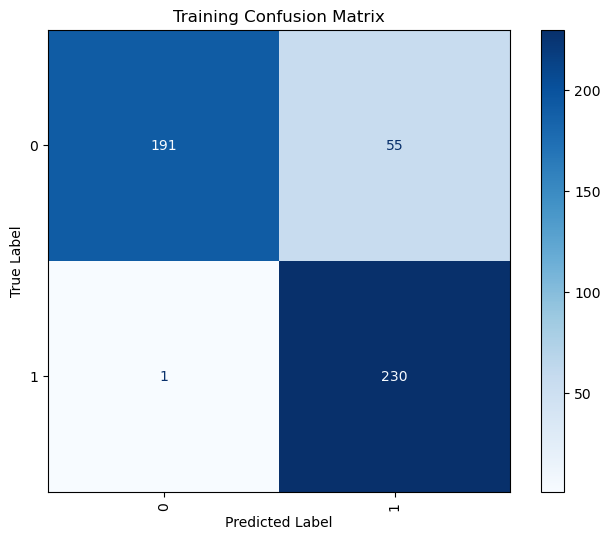

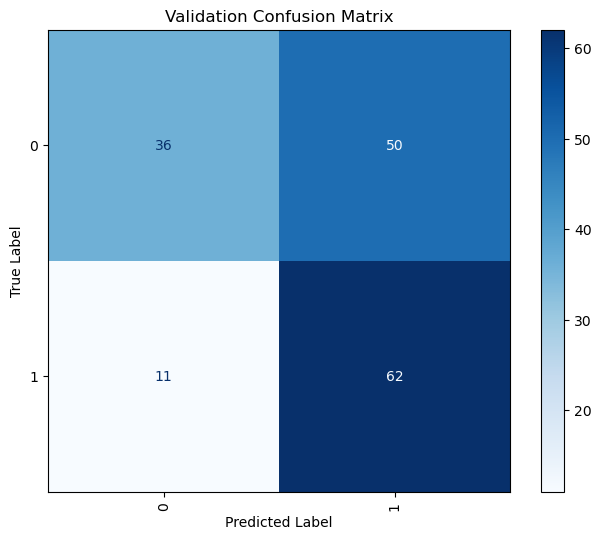

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the training and validation sets
y_train_pred = xgb_model.predict(X_train_normalized)
y_val_pred = xgb_model.predict(X_val_normalized)

# Generate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=xgb_model.classes_)
disp_train.plot(cmap='Blues', xticks_rotation='vertical', ax=plt.gca())
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=xgb_model.classes_)
disp_val.plot(cmap='Blues', xticks_rotation='vertical', ax=plt.gca())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
